<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


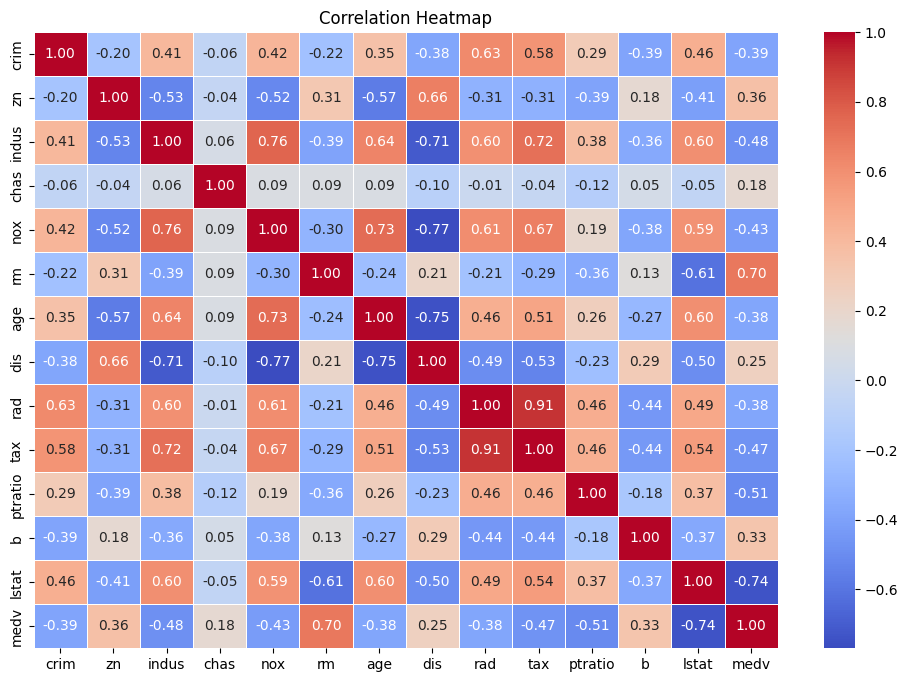

(404, 13) (102, 13)
Mean Squared Error (MSE): 24.291119474973538
R-squared (R²): 0.6687594935356317


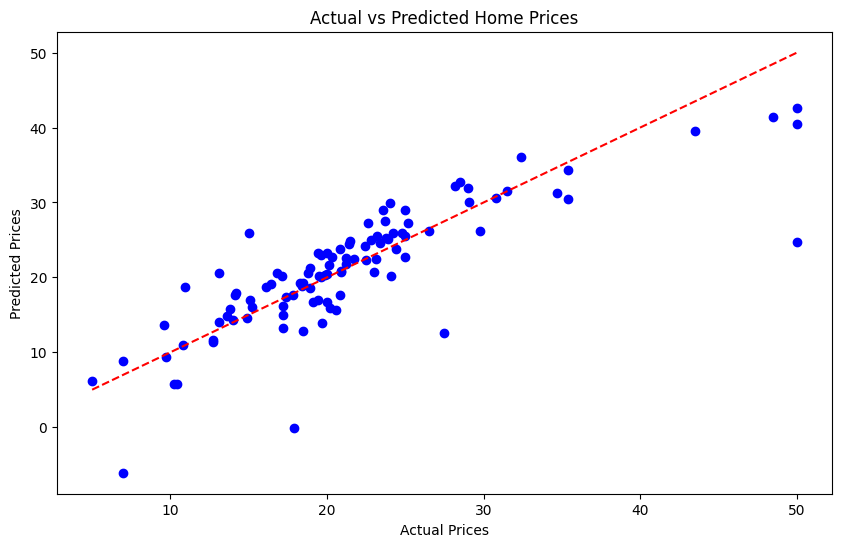

         Coefficient
crim       -0.113056
zn          0.030110
indus       0.040381
chas        2.784438
nox       -17.202633
rm          4.438835
age        -0.006296
dis        -1.447865
rad         0.262430
tax        -0.010647
ptratio    -0.915456
b           0.012351
lstat      -0.508571
Intercept: 30.24675099392349
Predicted Home Price for New Data: 25.61318222148598


d:\Samarth\B.E DY Patil Pimpri\TE SEM 6\DSBDA Lab\Test\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

df = pd.read_csv('bostonhousing.csv')
df.head()
df.info()
df.describe()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

df.isnull().sum()
df.dropna(inplace=True)

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Home Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

print(f'Intercept: {model.intercept_}')

joblib.dump(model, 'linear_regression_boston_model.pkl')

new_data = np.array([[0.1, 18, 2.31, 0, 0.4, 6.1, 45, 6.5, 5, 300, 15, 400, 10]])
new_prediction = model.predict(new_data)
print(f'Predicted Home Price for New Data: {new_prediction[0]}')
